<a href="https://colab.research.google.com/github/Belajargihh/-Billy-Jes-TugasMachineLearning/blob/main/Analisis_Prediksi_Kebangkrutan_Perusahaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Perbandingan Prediksi Kebangkrutan Perusahaan dengan Menggunakan SVM

1. Venus Angela Kurniawan (21/473226/PA/20373)
2. Dyandra Aulia (21/473733/PA/20423)
3. Maeve Zahwa Adriana Crown Zaki (21/477527/PA/20675)
4. Coveeta Kosambi (21/474894/PA/20505)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Info

Dataset yang kami gunakan merupakan dataset berjudul **Company Bankruptcy Prediction** yang kami ambil dari kaggle dengan tautan berikut: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction. Dataset ini terdiri dari 96 kolom dan 6819 baris, dengan 1 kolom merupakan kolom hasil prediksi yang terdiri dari nilai 0 yang menandakan tidak bangkrut dan nilai 1 yang menandakan bahwa sebuah perusahaan itu bangkrut.



# Preparation



### Library Preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Data Preparation

Untuk menjalankan program, perlu diunggah terlebih dahulu file data.csv ke dalam folder Google Colab maupun folder dalam komputer masing-masing. File data.csv dapat diunduh pada pranala berikut: https://drive.google.com/file/d/12ElEP0yU4fLiCWw_9s43cordQ7WWkxYE/view?usp=sharing

#### Data Exploration

In [4]:
df = pd.read_csv("/content/drive/MyDrive/(Billy Jes)TM9 dataset/data.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [5]:
df.shape

(6819, 96)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Dapat dilihat dari informasi mengenai data bahwasanya tidak ada kolom yang memiliki nilai null, sehingga tidak perlu dilakukan Data Imputation

In [7]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [8]:
df[['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']].head(10)

,Bankrupt?,Liability-Assets Flag,Net Income Flag
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
5,1,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


Dari hasil describe ini, dapat dilihat pada kolom 'Liability-Assets Flag' dan 'Bankrupt?' terdapat abnormalitas berupa nilai kolom minimum, 25%, 50%, dan 75% adalah 0, sementara nilai max nya adalah 1. Begitu pula pada kolom Net Income Flag, dapat terlihat bahwasanya seluruh kolom minimum, 25%, 50%, dan 75% bernilai 1. Setelah ditelusuri, ternyata betul bahwa ketiga kolom tersebut bernilai 0 dan 1 sehingga dapat dikategorikan sebagai data kategorikal, bukan numerikal.

Meskipun demikian, target yang akan digunakan hanyalah kolom 'Bankrupt?'. Oleh karena itu, kedua kolom lainnya yang berjenis kategorikal dapat dibuang dan tidak digunakan agar proses latih dan model yang dihasilkan dapat lebih akurat.


In [9]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

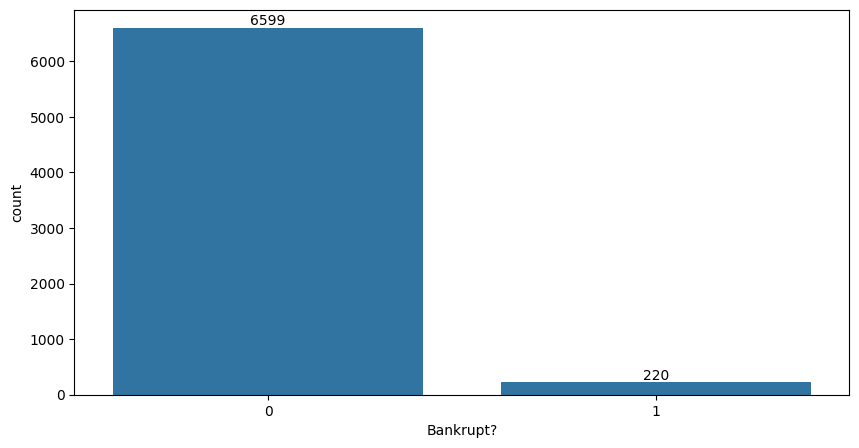

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax = sns.countplot(ax=ax, data=df, x='Bankrupt?')
for container in ax.containers:
    ax.bar_label(container)

Dapat dilihat dari grafik di atas bahwasanya data yang digunakan ini sangat tidak balance, di mana terdapat 6599 data berlabel 0 dan 220 data berlabel 1. Oleh karena itu, perlu dilakukan proses penyeimbangan data dengan cara oversampling maupun undersampling.

Kesimpulan dari hasil eksplorasi terhadap data:
1. Kolom 'Bankrupt?' akan menjadi target, sementara 95 kolom lainnya akan menjadi fitur
2. Tidak ada data null, sehingga tidak perlu dilakukan imputation
3. Ada dua kolom kategorikal, sehingga kedua kolom tersebut dapat dihapuskan atau tidak diikutsertakan dalam modeling agar seluruh fitur yang digunakan berjenis sama
4. Data sangat tidak seimbang, label 0 jauh lebih dominan, sehingga perlu dilakukan oversampling maupun undersampling

#### Splitting & Oversampling Data

In [11]:
X = df.drop(['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag'], axis=1)
y = df['Bankrupt?']

Data akan dibagi menjadi 3 jenis, yakni data latih (train), data validasi (val), dan data uji (test), dengan persentase pembagian ialah 0.64 : 0.16 : 0.2 untuk train : val : test

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=27, stratify=y_train)

print("X Train shape:",X_train.shape)
print("X Test shape:",X_test.shape)
print("y Train shape:",y_train.shape)
print("y Test shape:",y_test.shape)
print("X Val shape:",X_val.shape)
print("y Val shape:",y_val.shape)

X Train shape: (4364, 93)
X Test shape: (1364, 93)
y Train shape: (4364,)
y Test shape: (1364,)
X Val shape: (1091, 93)
y Val shape: (1091,)


Karena data sangat tidak seimbang, maka perlu dilakukan penyeimbangan agar jumlah data dengan label 0 sama dengan jumlah data dengan label 1.
Penyeimbangan ini hanya dilakukan pada data latih (train). Kami menggunakan bantuan dari library imblearn untuk melakukan oversampling dengan metode SMOTE.

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [14]:
X_res.shape

(8446, 93)

In [15]:
y_res.value_counts()

Bankrupt?
0    4223
1    4223
Name: count, dtype: int64

### Model Preparation



#### Import Library

In [17]:
from sklearn.svm import SVC


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#### Fungsi untuk Training dan Evaluasi Model

**1. Model Report**

Fungsi yang digunakan untuk membuat dataframe yang berisi jenis model dan metriks evaluasinya

In [19]:
def model_report(data, model_name, ytest, ypred):
    dict = {}
    dict['Model'] = model_name
    dict['Accuracy'] = accuracy_score(ytest, ypred)
    dict['F-1'] = f1_score(ytest, ypred)
    dict['Recall'] = recall_score(ytest, ypred)
    dict['Precision'] = precision_score(ytest, ypred)
    return pd.concat([data, pd.DataFrame(dict, index=[0])], ignore_index=True)

**2. Train Model**

Fungsi yang digunakan untuk melatih semua jenis algoritma klasifikasi yang akan digunakan, mulai dari Logistic Regression, SVM, Decision Tree, Naive Bayes, hingga KNN dan membuat model berbasis data latih tersebut. Tiap model kemudian akan dimasukkan ke dalam fungsi model_report yang akan memasukkan informasi mengenai model dan evaluasi metriksnya ke dalam dataframe

In [20]:
def train_model(trainX, trainY, testX, testY):
    models = pd.DataFrame(columns=['Model', "Accuracy", 'F-1', 'Recall', 'Precision'])

    svm = SVC(random_state=42)
    svm.fit(trainX, trainY)
    svm_pred = svm.predict(testX)
    models = model_report(models,"SVM", testY, svm_pred)

    return models

# Baseline



Baseline digunakan sebagai benchmark dari proses modeling dan training, di mana data yang digunakan untuk baseline merupakan data asli yang belum dipreprocessing. Pada bagian baseline ini kami mencoba untuk melakukan training model untuk data sebelum oversampling dan data setelah oversampling.

In [21]:
baseline = train_model(X_train, y_train, X_test, y_test)
baseline

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.967742,0.0,0.0,0.0


In [22]:
baseline = train_model(X_res, y_res, X_test, y_test)
baseline

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.779326,0.122449,0.477273,0.070234


Berdasarkan perbandingan, dapat dilihat bahwasanya hasil evaluasi terutama pada metrik F1 memiliki nilai yang lebih baik pada data yang telah di-oversampling dengan SMOTE, sehingga untuk proses ke depannya akan digunakan data yang telah di-oversampling, bukan data awal

# Normalisasi Fitur



Bagian kedua ialah normalisasi fitur. Normalisasi ini dilakukan untuk menyamakan skala dari seluruh data yang ada menjadi data bernilai di rentang 0 sampai 1. Hal ini dilakukan agar tidak ada data yang terlalu dominan karena nilainya lebih besar dibanding data pada fitur yang lain. Di sini kami menggunakan jenis normalisasi berupa standard scaler yang menggunakan standar deviasi dan minmax scaler.

## Standard Scaler



Pertama, kami membangun kelas StandardScaler secara manual yang terdiri dari empat function, yakni fungsi init yang berperan sebagai constructor, fungsi fit untuk menangkap pola yang dihasilkan saat melakukan scaling pada data train dengan menggunakan hasil perhitungan dari fungsi standard_scaler, fungsi standard_scaler untuk melakukan perhitungan standar deviasi, dan fungsi transform untuk mengubah nilai data berdasar nilai mean dan standar deviasi yang telah disimpan di fungsi fit

In [23]:
class StandardScaler():
    def __init__(self) -> None:
        self.mean = {}
        self.std = {}

    def fit(self,trainX):
        for col in trainX:
            self.mean[col] = (np.mean(trainX[col]))
            self.std[col]= (np.std(trainX[col]))

    def standard_scaler(self,x,col):
        xmean = self.mean[col]
        xstd = self.std[col]
        x_std_scaled = (x - xmean) / xstd
        return x_std_scaled

    def transform(self,trainX):
        result = trainX.copy()
        for col in trainX:
            result[col] = trainX[col].apply(lambda x: self.standard_scaler(x, col))
        return result


In [24]:
scaler = StandardScaler()
scaler.fit(X_res)
X_train_standard = scaler.transform(X_res)
X_test_standard = scaler.transform(X_test)
X_val_standard = scaler.transform(X_val)


In [25]:
normalization_sc = train_model(X_train_standard, y_res, X_test_standard, y_test)
normalization_sc

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.923021,0.313725,0.545455,0.220183


Terlihat bahwasanya nilai F1 pada data yang telah dinormalisasi menggunakan standar deviasi memiliki nilai yang jauh lebih baik dibandingkan nilai F1 pada data sebelum normalisasi alias baseline, terutama pada model Logistic Regression, SVM, Decision Tree, dan KNN.

## MinMax Scaler



Jenis normalisasi kedua yang kami gunakan ialah minmax scaler, di mana pada normalisasi ini akan digunakan nilai minimum dan maksimum dari data untuk menormalisasi data. Kami membangun kelas MinMax Scale yang terdiri dari empat fungsi, yakni fungsi init sebagai constructor dari kelas, fungsi fit untuk menyimpan nilai minimum dan maksimum pada data train, fungsi minmax_scaler untuk melakukan perhitungan dari nilai minimum dan maksimum tersebut, dan fungsi transform untuk melakukan normalisasi pada data berdasarkan fungsi minmax scaler yang tadi telah dibuat.

In [26]:
class MinMaxScale():
    def __init__(self) -> None:
        self.max_val = pd.Series(dtype="float64")
        self.min_val = pd.Series(dtype="float64")

    def fit(self,trainX):
        self.min_val = np.min(trainX, axis=0)
        self.max_val = np.max(trainX, axis=0)

    def minmax_scaler(self,trainX,feature_range=(0, 1)):
        scaled_X = (trainX - self.min_val) / (self.max_val - self.min_val)
        scaled_X = scaled_X * (feature_range[1] - feature_range[0]) + feature_range[0]
        return scaled_X

    def transform(self,trainX,feature_range=(0, 1)):
        result = self.minmax_scaler(trainX,feature_range)
        return result

In [27]:
scaler = MinMaxScale()
scaler.fit(X_res)
X_train_minmax = scaler.transform(X_res)
X_test_minmax = scaler.transform(X_test)
X_val_minmax = scaler.transform(X_val)

In [28]:
normalization_mm = train_model(X_train_minmax, y_res, X_test_minmax, y_test)
normalization_mm

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.896628,0.298507,0.681818,0.191083


Terlihat bahwasanya nilai F1 pada data yang telah dinormalisasi menggunakan nilai minimum maksimum memiliki nilai yang jauh lebih baik dibandingkan nilai F1 pada data sebelum normalisasi alias baseline, terutama pada model Logistic Regression, SVM, Decision Tree, dan KNN.

## Perbandingan Hasil Normalisasi

**Hasil normalisasi menggunakan Standard Scaler**

In [29]:
normalization_sc

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.923021,0.313725,0.545455,0.220183


**Hasil normalisasi menggunakan MinMax Scaler**

In [30]:
normalization_mm

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.896628,0.298507,0.681818,0.191083


In [31]:
pd.DataFrame({'Standard Scaler': normalization_sc['F-1'].mean(), 'MinMax Scaler': normalization_mm['F-1'].mean()}, index = [0])

,Standard Scaler,MinMax Scaler
0,0.313725,0.298507


Dapat dilihat bahwasanya secara rerata, nilai evaluasi metriks F1 pada model yang dinormalisasi menggunakan Standard Scaler memiliki nilai yang lebih tinggi dibandingkan nilai evaluasi metriks F1 pada model yang dinormalisasi menggunakan MinMax Scaler, sehingga dalam hal ini, **Standard Scaler** lebih cocok untuk digunakan sebagai metode normalisasi untuk data yang kami miliki.

# Feature Selection



Proses seleksi fitur dilakukan menggunakan ANOVA, yang mana fungsinya kami buat secara manual. Penggunaan ANOVA sebagai metode untuk menyeleksi fitur ini kami pilih karena data yang akan kami proses memiliki jenis numerikal dengan target data berjenis kategorikal.

Pada proses ini, kami mendefinisikan beberapa fungsi sebagai berikut:
1. AnovaFeatureSelection: merupakan fungsi untuk melakukan perhitungan berbasis nilai fscore pada tiap fitur
2. ShowFS: fungsi untuk menampilkan daftar nama fitur beserta skor fscore yang dihitung oleh fungsi AnovaFeatureSelection sebanyak k fitur yang memiliki skor tertinggi
3. score_per_k: fungsi untuk menghitung nilai k paling optimal dengan menggunakan iterasi pada fungsi ShowFS dan melakukan training model menggunakan daftar fitur yang dihasilkan oleh fungsi ShowFS, kemudian mencari nilai rerata F1 pada tiap model untuk setiap k
4. select_k: fungsi untuk mencari nilai rerata F1 mana yang paling tinggi dari tiap k, di mana nilai yang paling tinggi tersebut menandakan bahwasanya k yang digunakan merupakan k paling optimal

## Method Preparation


In [32]:
def AnovaFeatureSelection (trainX,trainY):
    fscores = []

    temp = np.array(trainX)
    ind0 = trainY == 0
    ind1 = trainY == 1

    for col in temp.T:
        X0 = col[ind0]
        X1 = col[ind1]

        meanall = np.mean(col)
        mean0 = np.mean(X0)
        mean1 = np.mean(X1)

        dbc = (sum(ind0) * (mean0 - meanall)**2) + (sum(ind1) * (mean1 - meanall)**2)
        ssw1 = np.sum((X0 - mean0)**2)
        ssw2 = np.sum((X1 - mean1)**2)
        nt = sum(ind0) + sum(ind1) - 2
        cof = (ssw1 + ssw2)/nt

        fscore = dbc/cof
        fscores.append(fscore)
    return fscores

In [33]:
def ShowFS(data, target, k):
    score = AnovaFeatureSelection(data, target)

    df = pd.DataFrame({'Features':data.columns, 'Scores':score})
    df.sort_values(by='Scores', ascending=False, inplace = True)
    df = df.iloc[:k,:]
    return df

In [34]:
def score_per_k (trainX, trainY, validX, validY):
    num_k = []
    scores = []

    for i in range(1, len(trainX.columns)):
        num_k.append(i)
        df = ShowFS(trainX, trainY, i)
        df_train = train_model(trainX[df["Features"]], trainY, validX[df["Features"]], validY)
        scores.append(df_train['F-1'].mean())

    df_k = pd.DataFrame({'K':num_k, 'Mean F1 Scores':scores})
    return df_k

In [35]:
def select_k (df_k):
    max_f1_score = df_k['Mean F1 Scores'].idxmax()
    k_optimal = df_k.loc[max_f1_score, 'K']
    return k_optimal

## Implementation

Proses seleksi fitur dengan menggunakan ANOVA ini kami lakukan pada 3 jenis data, yakni data baseline, data hasil normalisasi standard scaler, dan data hasil normalisasi minmax scaler. Pada ketiganya, didefinisikan variabel sebagai berikut:

1. df_k = variabel untuk menyimpan hasil dari fungsi score_per_k yang menunjukkan rerata nilai F1 pada tiap hasil training menggunakan k fitur
2. k_optimal = variabel untuk menyimpan hasil dari fungsi select_k yang memilih jumlah k atau jumlah fitur paling optimal berdasar nilai rerata F1 tertinggi
3. df_anova = variabel untuk menyimpan nama-nama fitur sebanyak k buah yang memiliki skor anova paling tinggi

Setelah itu, akan didefinisikan nilai X_train dan X_test yang baru, yang mana kedua nilai tersebut kini hanya memiliki fitur-fitur sebanyak k buah yang telah disimpan di df_anova sebelumnya. Nilai X_train dan X_test yang baru ini kemudian digunakan untuk menghitung akurasi pada model

### Baseline \+ Feature Selection



In [36]:
df_k = score_per_k(X_res, y_res, X_val, y_val)
df_k

,K,Mean F1 Scores
0,1,0.189091
1,2,0.168224
2,3,0.252174
3,4,0.234234
4,5,0.256881
...,...,...
87,88,0.083333
88,89,0.083333
89,90,0.083333
90,91,0.083333


In [37]:
k_optimal = select_k (df_k)

print("Banyak fitur optimal untuk diambil:", k_optimal)

Banyak fitur optimal untuk diambil: 27


In [38]:
df_anova = ShowFS(X_res, y_res, k_optimal)
df_anova

,Features,Scores
37,Net worth/Assets,5352.318099
36,Debt ratio %,5352.318099
0,ROA(C) before interest and depreciation befor...,4307.201513
2,ROA(B) before interest and depreciation after...,4211.783068
18,Persistent EPS in the Last Four Seasons,4150.852605
1,ROA(A) before interest and % after tax,3956.168533
42,Net profit before tax/Paid-in capital,3781.857843
84,Net Income to Total Assets,3688.749978
22,Per Share Net profit before tax (Yuan ¥),3609.132636
16,Net Value Per Share (A),2948.104950


In [39]:
X_train_selected = X_res[df_anova['Features']]
X_test_selected = X_test[df_anova['Features']]
model_anova = train_model(X_train_selected, y_res, X_test_selected, y_test)
model_anova

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.875367,0.279661,0.75,0.171875


In [40]:
selisih = model_anova['F-1']-baseline['F-1']
print("Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS): ", selisih.mean()*100, "%")

Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS):  15.721203735731578 %


> Dapat dilihat bahwasanya tingkat keakuratan pada data baseline yang tidak dinormalisasi meningkat dratis pada metrik F1, Recall, dan Position, di mana tiap model mengalami peningkatan nilai F1 sekitar 20%.

#### Standard Scaling \+ Feature Selection



In [41]:
df_k_standard = score_per_k (X_train_standard, y_res, X_val_standard, y_val)
df_k_standard

,K,Mean F1 Scores
0,1,0.189091
1,2,0.189091
2,3,0.227074
3,4,0.252174
4,5,0.255708
...,...,...
87,88,0.278689
88,89,0.278689
89,90,0.278689
90,91,0.308943


In [42]:
k_optimal_standard = select_k (df_k_standard)

print("Banyak fitur optimal untuk diambil:", k_optimal_standard)

Banyak fitur optimal untuk diambil: 60


In [43]:
df_anova_standard = ShowFS(X_train_standard, y_res, k_optimal_standard)
df_anova_standard

,Features,Scores
36,Debt ratio %,5352.318099
37,Net worth/Assets,5352.318099
0,ROA(C) before interest and depreciation befor...,4307.201513
2,ROA(B) before interest and depreciation after...,4211.783068
18,Persistent EPS in the Last Four Seasons,4150.852605
1,ROA(A) before interest and % after tax,3956.168533
42,Net profit before tax/Paid-in capital,3781.857843
84,Net Income to Total Assets,3688.749978
22,Per Share Net profit before tax (Yuan ¥),3609.132636
16,Net Value Per Share (A),2948.104950


In [44]:
X_train_selected_standard = X_train_standard[df_anova_standard['Features']]
X_test_selected_standard = X_test_standard[df_anova_standard['Features']]
model_anova_standard = train_model(X_train_selected_standard, y_res, X_test_selected_standard, y_test)
model_anova_standard

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.917889,0.282051,0.5,0.196429


In [45]:
selisih = model_anova_standard['F-1']-normalization_sc['F-1']
print("Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS): ", selisih.mean()*100, "%")

Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS):  -3.167420814479638 %


> Dapat dilihat bahwasanya tingkat keakuratan pada data hasil normalisasi dengan Standard Scaler mengalami peningkatan pada metrik F1, Recall, dan Position, di mana model mengalami peningkatan nilai F1 dengan rerata 6%, dengan peningkatan paling drastis ada pada model Naive Bayes yang meningkat sebanyak 0.22, sementara pada model Logistic Regression dan Decision Tree justru mengalami penurunan 0.02

#### Minmax Scaling \+ Feature Selection



In [46]:
df_k_minmax = score_per_k (X_train_minmax, y_res, X_val_minmax, y_val)
df_k_minmax

,K,Mean F1 Scores
0,1,0.189091
1,2,0.170886
2,3,0.237288
3,4,0.238298
4,5,0.251121
...,...,...
87,88,0.227545
88,89,0.227545
89,90,0.227545
90,91,0.227545


In [47]:
k_optimal_minmax = select_k (df_k_minmax)

print("Banyak fitur optimal untuk diambil:", k_optimal_minmax)

Banyak fitur optimal untuk diambil: 29


In [48]:
df_anova_minmax = ShowFS(X_train_minmax, y_res, k_optimal_minmax)
df_anova_minmax

,Features,Scores
36,Debt ratio %,5352.318099
37,Net worth/Assets,5352.318099
0,ROA(C) before interest and depreciation befor...,4307.201513
2,ROA(B) before interest and depreciation after...,4211.783068
18,Persistent EPS in the Last Four Seasons,4150.852605
1,ROA(A) before interest and % after tax,3956.168533
42,Net profit before tax/Paid-in capital,3781.857843
84,Net Income to Total Assets,3688.749978
22,Per Share Net profit before tax (Yuan ¥),3609.132636
16,Net Value Per Share (A),2948.104950


In [49]:
X_train_selected_minmax = X_train_minmax[df_anova_minmax['Features']]
X_test_selected_minmax = X_test_minmax[df_anova_minmax['Features']]
model_anova_minmax = train_model(X_train_selected_minmax, y_res, X_test_selected_minmax, y_test)
model_anova_minmax

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.8761,0.280851,0.75,0.172775


In [50]:
selisih = model_anova_standard['F-1']-normalization_mm['F-1']
print("Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS): ", selisih.mean()*100, "%")

Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS):  -1.6456180635285145 %


> Dapat dilihat bahwasanya tingkat keakuratan pada data hasil normalisasi dengan Minmax Scaler mengalami peningkatan pada metrik F1, Recall, dan Position, di mana setiap model mengalami peningkatan nilai F1 dengan rerata 6%, dengan peningkatan paling drastis ada pada model Naive Bayes yang meningkat sebanyak 0.22.

## Perbandingan Hasil Feature Selection

**Feature Selection pada Baseline**

In [51]:
print("Fitur yang diambil: ", k_optimal)
model_anova

Fitur yang diambil:  27


,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.875367,0.279661,0.75,0.171875


**Feature Selection pada Standard Scaler**

In [52]:
print("Fitur yang diambil: ", k_optimal_standard)
model_anova_standard

Fitur yang diambil:  60


,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.917889,0.282051,0.5,0.196429


**Feature Selection pada Minmax Scaler**

In [53]:
print("Fitur yang diambil: ", k_optimal_minmax)
model_anova_minmax

Fitur yang diambil:  29


,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.8761,0.280851,0.75,0.172775


In [54]:
print("Rerata skor F1 Feature Selection pada Baseline: ", model_anova['F-1'].mean())
print("Rerata skor F1 Feature Selection pada Standard Scaler: ", model_anova_standard['F-1'].mean())
print("Rerata skor F1 Feature Selection pada Minmax Scaler: ", model_anova_minmax['F-1'].mean())

Rerata skor F1 Feature Selection pada Baseline:  0.2796610169491525
Rerata skor F1 Feature Selection pada Standard Scaler:  0.28205128205128205
Rerata skor F1 Feature Selection pada Minmax Scaler:  0.2808510638297872


> Meskipun fokus utama kelompok kami pada bagian ini ialah feature selection untuk data yang telah dinormalisasi dengan standard scaler, tetapi dari hasil eksplorasi, dapat terlihat bahwasanya nilai rerata metrik F1 untuk feature selection pada baseline dan minmax scaler memiliki nilai yang cukup dekat. Meskipun demikian, dapat dilihat bahwasanya **rerata skor F1 paling tinggi dimiliki oleh data hasil Standard Scaler yang telah diseleksi fiturnya**.

# PCA



Pada bagian ini, kami menggunakan PCA untuk dimensionality reduction, yang mana fungsinya kami buat secara manual. Proses dimensionality reduction ini akan mengurangi jumlah dimensi dengan cara menggabungkan informasi dari beberapa fitur menjadi hanya satu fitur saja, sehingga nanti jumlah fitur yang ada akan berkurang.

Pada proses ini, kami mendefinisikan satu kelas, yakni kelas PCAScratch yang terdiri dari tiga fungsi:
1. init: constructor dari kelas yang digunakan untuk mendefinisikan nilai banyak fitur/dimensi/k akhir yang akan digunakan
2. fit: untuk menghitung nilai PCA untuk menentukan komponen-komponen sebanyak k buah yang akan digunakan sebagai fitur akhir
3. transform: digunakan untuk mengubah fitur-fitur dalam variabel untuk disesuaikan dengan fitur yang didapatkan oleh fungsi fit tadi.

Selain itu, pada proses ini terdapat beberapa fungsi lain sebagai berikut:
1. ShowPCA: fungsi untuk mengubah data train dan test maupun val ke bentuk baru yang mana terdiri dari fitur-fitur yang didapatkan dari kelas PCAScratch
2. score_per_k_pca: fungsi untuk menghitung nilai k alias banyak fitur paling optimal dengan menggunakan iterasi pada fungsi ShowPCA dan melakukan training model menggunakan daftar fitur yang dihasilkan oleh fungsi ShowPCA, kemudian mencari nilai rerata F1 pada tiap model untuk setiap k
3. select_k_pca: fungsi untuk mencari nilai rerata F1 mana yang paling tinggi dari tiap k dari hasil yang dihasilkan oleh score_per_k_pca, di mana nilai yang paling tinggi tersebut menandakan bahwasanya k yang digunakan merupakan k paling optimal

## Method Preparation

In [55]:
class PCAScratch():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
        self.feature_names_ = None

    def fit(self, X):
        self.mean_ = X.mean()
        X_centered = X - self.mean_

        cov_matrix = np.cov(X_centered.values, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]

        self.components_ = sorted_eigenvectors[:, :self.n_components]
        return self.components_

    def transform(self, X):
        X_centered = X - self.mean_

        transformed_data = np.dot(X_centered.values, self.components_)

        return transformed_data

In [56]:
def ShowPCA (trainX, valX, k):
    pca = PCAScratch(k)
    pca.fit(trainX)

    trainX_pca = pca.transform(trainX)
    valX_pca = pca.transform(valX)

    return trainX_pca, valX_pca

In [57]:
def score_per_k_pca (trainX, trainY, valX, valY):
    num_k = []
    scores = []

    for i in range(1, len(trainX.columns)):
        num_k.append(i)

        X_train_pca, X_val_pca = ShowPCA(trainX, valX, i)

        df_train = train_model(X_train_pca, trainY, X_val_pca, valY)
        scores.append(df_train['F-1'].mean())

    df_k = pd.DataFrame({'K':num_k, 'Mean F1 Scores':scores})
    return df_k

In [58]:
def select_k_pca (df_k):
    max_f1_score = df_k['Mean F1 Scores'].idxmax()
    k_optimal = df_k.loc[max_f1_score, 'K']
    return k_optimal

## Implementation

Proses dimensionality reduction dengan menggunakan PCA ini kami lakukan pada 3 jenis data, yakni data baseline, data hasil normalisasi standard scaler, dan data hasil normalisasi minmax scaler. Pada ketiganya, didefinisikan variabel sebagai berikut:

1. df_k_pca = variabel untuk menyimpan hasil dari fungsi score_per_k yang menunjukkan rerata nilai F1 pada tiap hasil training menggunakan k fitur
2. k_optimal_pca = variabel untuk menyimpan hasil dari fungsi select_k yang memilih jumlah k atau jumlah fitur paling optimal berdasar nilai rerata F1 tertinggi

Setelah itu, akan didefinisikan nilai X_train dan X_test yang baru, yang mana kedua nilai tersebut kini hanya memiliki fitur-fitur sebanyak k buah yang didapat dari pemanggilan fungsi ShowPCA. Nilai X_train dan X_test yang baru ini kemudian digunakan untuk menghitung akurasi pada model

### Baseline + PCA

In [59]:
df_k_pca = score_per_k_pca(X_res, y_res, X_val, y_val)
df_k_pca

,K,Mean F1 Scores
0,1,0.066465
1,2,0.058252
2,3,0.054737
3,4,0.046110
4,5,0.051780
...,...,...
87,88,0.103286
88,89,0.103286
89,90,0.103286
90,91,0.103286


In [60]:
k_optimal_pca = select_k_pca(df_k_pca)

print("Banyak fitur optimal untuk diambil:", k_optimal_pca)

Banyak fitur optimal untuk diambil: 21


In [61]:
X_train_pca, X_test_pca = ShowPCA(X_res, X_test, k_optimal_pca)

In [62]:
model_pca = train_model(X_train_pca, y_res, X_test_pca, y_test)
model_pca

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.818915,0.114695,0.363636,0.068085


In [63]:
selisih = model_pca['F-1']-baseline['F-1']
print("Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS): ", selisih.mean()*100, "%")

Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS):  -0.7753639090044617 %


> Dapat dilihat bahwasanya tingkat keakuratan pada data baseline yang tidak dinormalisasi justru menurun pada metrik F1, Recall, dan Position, di mana tiap model mengalami rerata penurunan sebesar 0.18%. Ini menunjukkan bahwa PCA tidak cocok digunakan pada baseline yang belum dinormalisasi.

### Standard Scalling + PCA

In [64]:
df_k_pca_standard = score_per_k_pca(X_train_standard, y_res, X_val_standard, y_val)
df_k_pca_standard

,K,Mean F1 Scores
0,1,0.235294
1,2,0.238683
2,3,0.251121
3,4,0.258929
4,5,0.242718
...,...,...
87,88,0.308943
88,89,0.308943
89,90,0.308943
90,91,0.308943


In [65]:
k_optimal_pca_standard = select_k_pca(df_k_pca_standard)

print("Banyak fitur optimal untuk diambil:", k_optimal_pca_standard)

Banyak fitur optimal untuk diambil: 64


In [66]:
X_train_pca_standard, X_test_pca_standard = ShowPCA(X_train_standard, X_test_standard, k_optimal_pca_standard)

In [67]:
model_pca_standard = train_model(X_train_pca_standard, y_res, X_test_pca_standard, y_test)
model_pca_standard

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.923021,0.322581,0.568182,0.225225


In [68]:
selisih = model_pca_standard['F-1']-normalization_sc['F-1']
print("Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS): ", selisih.mean()*100, "%")

Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS):  0.8855154965211887 %


> Dapat dilihat bahwasanya tingkat keakuratan pada data hasil normalisasi dengan Standard Scaler mengalami kenaikan pada metrik F1, Recall, dan Position, di mana model mengalami rerata kenaikan sebesar 2.5% dengan menggunakan PCA.

### Minmax Scalling + PCA

In [69]:
df_k_pca_minmax = score_per_k_pca(X_train_minmax, y_res, X_val_minmax, y_val)
df_k_pca_minmax

,K,Mean F1 Scores
0,1,0.081346
1,2,0.076782
2,3,0.077220
3,4,0.172549
4,5,0.219409
...,...,...
87,88,0.217822
88,89,0.217822
89,90,0.217822
90,91,0.217822


In [70]:
k_optimal_pca_minmax = select_k_pca(df_k_pca_minmax)

print("Banyak fitur optimal untuk diambil:", k_optimal_pca_minmax)

Banyak fitur optimal untuk diambil: 14


In [71]:
X_train_pca_minmax, X_test_pca_minmax = ShowPCA(X_train_minmax, X_test_minmax, k_optimal_pca_minmax)

In [72]:
model_pca_minmax = train_model(X_train_pca_minmax, y_res, X_test_pca_minmax, y_test)
model_pca_minmax

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.920088,0.268456,0.454545,0.190476


In [73]:
selisih = model_pca_minmax['F-1']-normalization_mm['F-1']
print("Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS): ", selisih.mean()*100, "%")

Rerata peningkatan nilai F1 (Sebelum FS dan setelah FS):  -3.0051086847641018 %


> Dapat dilihat bahwasanya tingkat keakuratan pada data hasil normalisasi dengan Minmax Scaler mengalami kenaikan pada metrik F1, Recall, dan Position, di mana model mengalami rerata kenaikan sebesar 2.8% dengan menggunakan PCA.

## Perbandingan Hasil PCA

**PCA pada Baseline**

In [74]:
print("Fitur yang diambil: ", k_optimal_pca)
model_pca

Fitur yang diambil:  21


,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.818915,0.114695,0.363636,0.068085


**Feature Selection pada Standard Scaler**

In [75]:
print("Fitur yang diambil: ", k_optimal_pca_standard)
model_pca_standard

Fitur yang diambil:  64


,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.923021,0.322581,0.568182,0.225225


**Feature Selection pada Minmax Scaler**

In [76]:
print("Fitur yang diambil: ", k_optimal_pca_minmax)
model_pca_minmax

Fitur yang diambil:  14


,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.920088,0.268456,0.454545,0.190476


In [77]:
print("Rerata skor F1 PCA pada Baseline: ", model_pca['F-1'].mean())
print("Rerata skor F1 PCA pada Standard Scaler: ", model_pca_standard['F-1'].mean())
print("Rerata skor F1 PCA pada Minmax Scaler: ", model_pca_minmax['F-1'].mean())

Rerata skor F1 PCA pada Baseline:  0.11469534050179211
Rerata skor F1 PCA pada Standard Scaler:  0.3225806451612903
Rerata skor F1 PCA pada Minmax Scaler:  0.2684563758389262


> Meskipun fokus utama kelompok kami pada bagian ini ialah PCA untuk data yang telah dinormalisasi dengan standard scaler, tetapi dari hasil eksplorasi, dapat terlihat bahwasanya nilai rerata metrik F1 untuk PCA pada data hasil minmax scaler memiliki nilai yang cukup serupa. Meskipun demikian, dapat dilihat bahwasanya **rerata skor F1 paling tinggi dimiliki oleh data hasil Standard Scaler yang telah diseleksi fiturnya**.

# Perbandingan Hasil

**Baseline**

In [78]:
baseline

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.779326,0.122449,0.477273,0.070234


**Normalization (Standard Scaling)**

In [79]:
normalization_sc

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.923021,0.313725,0.545455,0.220183


**Feature Selection (After Normalization)**

In [80]:
model_anova_standard

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.917889,0.282051,0.5,0.196429


**PCA (After Normalization)**

In [81]:
model_pca_standard

,Model,Accuracy,F-1,Recall,Precision
0,SVM,0.923021,0.322581,0.568182,0.225225


In [82]:
print("Rerata skor F1 pada Baseline: ", baseline['F-1'].mean())
print("Rerata skor F1 pada Normalisasi Standard Scaler: ", normalization_sc['F-1'].mean())
print("Rerata skor F1 Feature Selection pada Standard Scaler: ", model_anova_standard['F-1'].mean())
print("Rerata skor F1 PCA pada Standard Scaler: ", model_pca_standard['F-1'].mean())

Rerata skor F1 pada Baseline:  0.12244897959183673
Rerata skor F1 pada Normalisasi Standard Scaler:  0.3137254901960784
Rerata skor F1 Feature Selection pada Standard Scaler:  0.28205128205128205
Rerata skor F1 PCA pada Standard Scaler:  0.3225806451612903


> Dapat terlihat bahwasanya rerata F1 pada data mengalami nilai paling bagus setelah data dinormalisasi dengan Standard Scaler dan mengalami pemilihan/seleksi fitur.